In [8]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [3]:
sp_filename = "000000000009"
sp_path = "train_points/{}_points.json".format(sp_filename)
image = cv2.imread('train2017/{}.jpg'.format(sp_filename))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

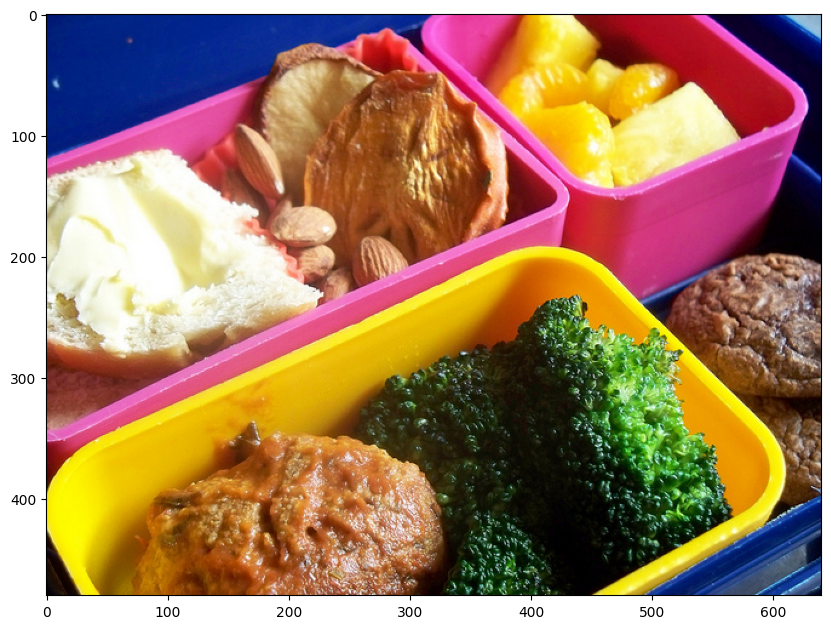

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [5]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "segment-anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [6]:
predictor.set_image(image)

In [24]:
with open(sp_path, 'r') as input_file:
  whole_input = json.load(input_file)

print(whole_input)

input_points = []
for pts in whole_input:
  individual_pts = pts['point']
  input_points.append(individual_pts)

print(input_points)



[{'image_id': 9, 'category_id': 51, 'point': [346.703051346051, 312.27], 'label': 'bowl'}, {'image_id': 9, 'category_id': 51, 'point': [508.3572262531143, 105.17], 'label': 'bowl'}, {'image_id': 9, 'category_id': 56, 'point': [407.53754892823855, 355.2], 'label': 'broccoli'}, {'image_id': 9, 'category_id': 51, 'point': [298.393865911237, 220.44], 'label': 'bowl'}, {'image_id': 9, 'category_id': 51, 'point': [117.8428808309038, 93.34], 'label': 'bowl'}, {'image_id': 9, 'category_id': 55, 'point': [414.1093465096641, 62.705], 'label': 'orange'}, {'image_id': 9, 'category_id': 55, 'point': [496.4007407606177, 61.765], 'label': 'orange'}, {'image_id': 9, 'category_id': 55, 'point': [440.3360714285715, 110.89], 'label': 'orange'}, {'image_id': 9, 'category_id': 55, 'point': [412.99834878272674, 35.535], 'label': 'orange'}]
[[346.703051346051, 312.27], [508.3572262531143, 105.17], [407.53754892823855, 355.2], [298.393865911237, 220.44], [117.8428808309038, 93.34], [414.1093465096641, 62.705]

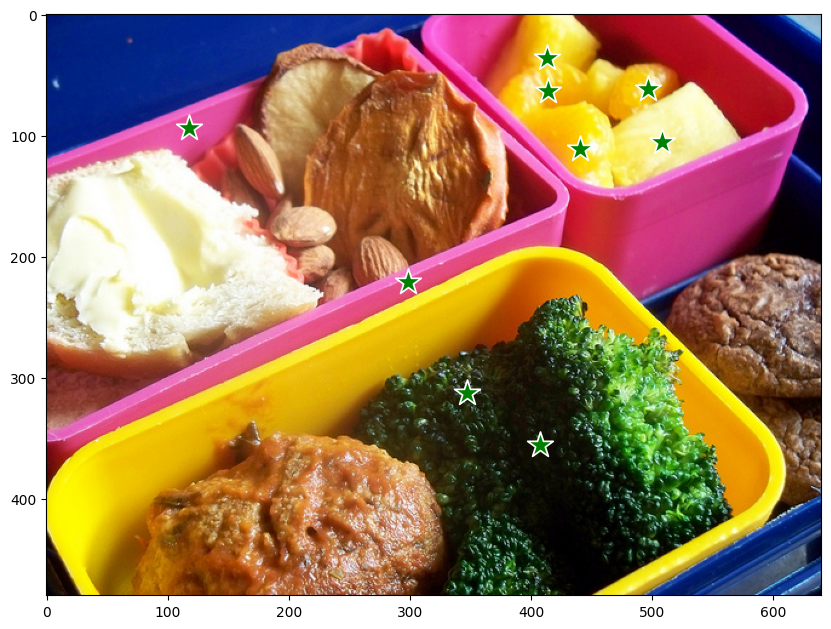

In [25]:
plt.figure(figsize=(10,10))
input_label = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
plt.imshow(image)

show_points(np.array(input_points), input_label, plt.gca())
plt.axis('on')
plt.show()